# Usage: scenario analysis
This is a quick tour of CovsirPhy. Details scenario analysis will be explained.
"Scenario analysis" means that we calculate the number of cases in the future phases with some sets of ODE parameter values. With this analysis, we can estimate the impact of our activities against the outbreak on the number of cases.

### Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.15.0-kappa'

### Dataset preparation
Download the datasets to "input" direcotry and load them.  
Please refer to [Usage: datasets](https://lisphilar.github.io/covid19-sir/usage_dataset.html) for the details.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt()

### Start scenario analysis
As an example, we will analysis the number of cases in Japan.

In [5]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

In [6]:
# If you want to stop displaying figures when using interactive shell,
# snl.interactive = False
# For temporally, plese use snl.records(show_figure=False) etc.
# If you want save figures,
# snl.interactive = False
# and please use snl.records(filename="records.jpg") etc.

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot. Some kind of complement will be done for analysis, if necessary.

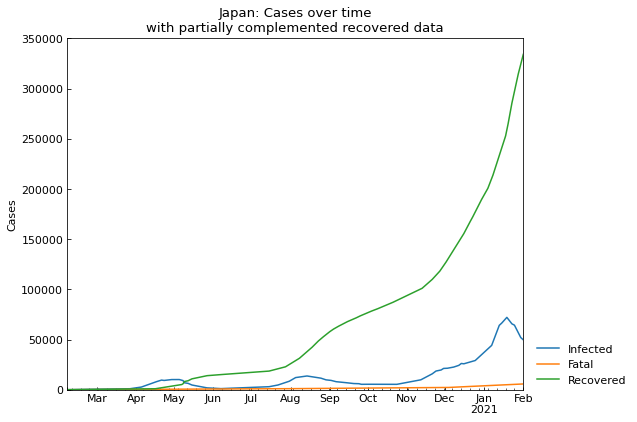

Date  Infected  Fatal  Recovered
357 2021-01-28     55812   5361     314434
358 2021-01-29     53816   5452     320248
359 2021-01-30     51945   5546     325592
360 2021-01-31     50623   5654     330465
361 2021-02-01     49671   5722     334125

In [7]:
record_df = snl.records()
record_df.tail()

We can calculate the number of daily new cases with `Scenario.record_diff()` method.

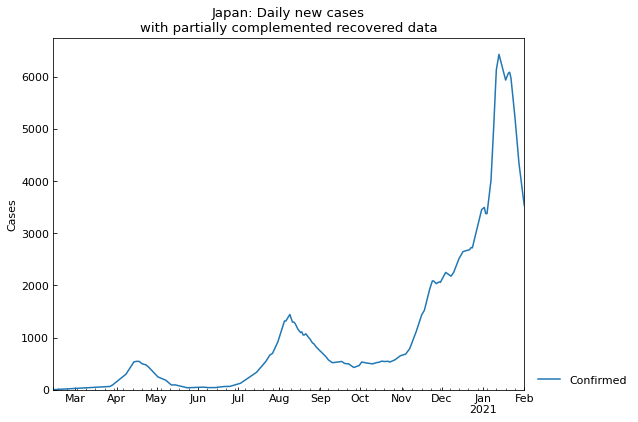

In [8]:
_ = snl.records_diff(variables=["Confirmed"], window=7)

`Scenario.show_complement()` method is useful to show the kinds of complement. The details of complement are explained in [Usage: datasets](https://lisphilar.github.io/covid19-sir/usage_dataset.html#The-number-of-cases-(JHU-style)) section.

In [9]:
complement_snl_df = snl.show_complement()
complement_snl_df.tail()

Country Province Monotonic_confirmed Monotonic_fatal Monotonic_recovered  \
0   Japan        -               False           False                True   

  Full_recovered Partial_recovered  
0          False              True

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

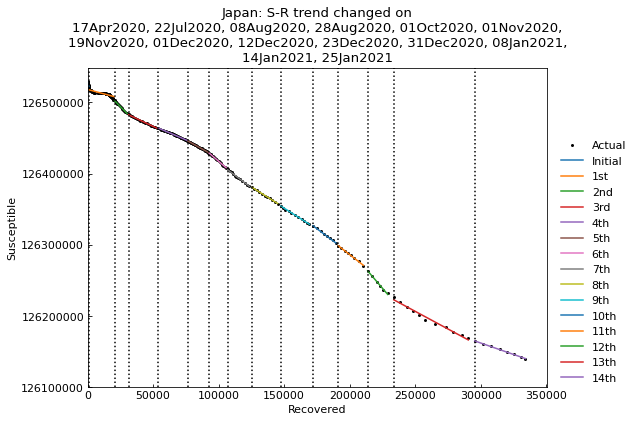

Type      Start        End  Population
0th   Past  06Feb2020  16Apr2020   126529100
1st   Past  17Apr2020  21Jul2020   126529100
2nd   Past  22Jul2020  07Aug2020   126529100
3rd   Past  08Aug2020  27Aug2020   126529100
4th   Past  28Aug2020  30Sep2020   126529100
5th   Past  01Oct2020  31Oct2020   126529100
6th   Past  01Nov2020  18Nov2020   126529100
7th   Past  19Nov2020  30Nov2020   126529100
8th   Past  01Dec2020  11Dec2020   126529100
9th   Past  12Dec2020  22Dec2020   126529100
10th  Past  23Dec2020  30Dec2020   126529100
11th  Past  31Dec2020  07Jan2021   126529100
12th  Past  08Jan2021  13Jan2021   126529100
13th  Past  14Jan2021  24Jan2021   126529100
14th  Past  25Jan2021  01Feb2021   126529100

In [10]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [11]:
# Estimate the parameter values of SIR-F model
# Default value of timeout is 180 sec
snl.estimate(cs.SIRF, timeout=60)


<SIR-F model: parameter estimation>
Running optimization with 8 CPUs...


	14th phase (25Jan2021 - 01Feb2021): finished  276 trials in 0 min 10 sec


	 4th phase (28Aug2020 - 30Sep2020): finished  306 trials in 0 min 30 sec

	 2nd phase (22Jul2020 - 07Aug2020): finished  524 trials in 0 min 50 sec

	 5th phase (01Oct2020 - 31Oct2020): finished  494 trials in 0 min 50 sec

	 6th phase (01Nov2020 - 18Nov2020): finished  608 trials in 1 min  0 sec

	 7th phase (19Nov2020 - 30Nov2020): finished  603 trials in 1 min  0 sec

	 0th phase (06Feb2020 - 16Apr2020): finished  527 trials in 1 min  0 sec

	 1st phase (17Apr2020 - 21Jul2020): finished  499 trials in 1 min  0 sec

	 3rd phase (08Aug2020 - 27Aug2020): finished  583 trials in 1 min  0 sec

	 8th phase (01Dec2020 - 11Dec2020): finished  413 trials in 0 min 40 sec

	11th phase (31Dec2020 - 07Jan2021): finished  259 trials in 0 min 20 sec

	 9th phase (12Dec2020 - 22Dec2020): finished  821 trials in 1 min  0 sec

	10th phase (23Dec2020 - 30Dec2020): finished  810 trials in 1 min  0 sec

	12th phase (08Jan2021 - 13Jan2021): finished  931 trials in 1 min  0 sec

	13th phase (14Jan2021 - 24Jan2021): finished  913 trials in 1 min  0 sec

Completed optimization. Total: 2 min 12 sec


In [12]:
# Show the sumamry of parameter estimation
snl.summary()

Type      Start        End  Population    ODE    Rt     theta     kappa  \
0th   Past  06Feb2020  16Apr2020   126529100  SIR-F  6.34  0.016412  0.000048   
1st   Past  17Apr2020  21Jul2020   126529100  SIR-F  0.53  0.083887  0.000039   
2nd   Past  22Jul2020  07Aug2020   126529100  SIR-F  1.96  0.001589  0.000002   
3rd   Past  08Aug2020  27Aug2020   126529100  SIR-F  0.97  0.000364  0.000076   
4th   Past  28Aug2020  30Sep2020   126529100  SIR-F  0.73  0.001618  0.000079   
5th   Past  01Oct2020  31Oct2020   126529100  SIR-F  1.07  0.000677  0.000067   
6th   Past  01Nov2020  18Nov2020   126529100  SIR-F  1.53  0.000252  0.000076   
7th   Past  19Nov2020  30Nov2020   126529100  SIR-F  1.33  0.000705  0.000037   
8th   Past  01Dec2020  11Dec2020   126529100  SIR-F  1.13  0.000503  0.000098   
9th   Past  12Dec2020  22Dec2020   126529100  SIR-F  1.21  0.000968  0.000117   
10th  Past  23Dec2020  30Dec2020   126529100  SIR-F  1.28  0.000243  0.000113   
11th  Past  31Dec2020  07Jan2021   126529100  SIR-F  1.46  0.001408  0.000079   
12th  Past  08Jan2021  13Jan2021   126529100  SIR-F  2.11  0.000086  0.000144   
13th  Past  14Jan2021  24Jan2021   126529100  SIR-F  1.08  0.000344  0.000079   
14th  Past  25Jan2021  01Feb2021   126529100  SIR-F  0.64  0.022849  0.000009   

           rho     sigma  tau  1/beta [day]  1/alpha2 [day]  1/gamma [day]  \
0th   0.006637  0.000982   96            10            1385             67   
1st   0.001932  0.003332   96            34            1696             20   
2nd   0.009073  0.004613   96             7           35976             14   
3rd   0.005233  0.005322   96            12             879             12   
4th   0.004509  0.006061   96            14             840             10   
5th   0.007630  0.007041   96             8             989              9   
6th   0.008784  0.005665   96             7             879             11   
7th   0.007246  0.005400   96             9            1806             12   
8th   0.006603  0.005752   96            10             678             11   
9th   0.006684  0.005383   96             9             569             12   
10th  0.006971  0.005345   96             9             588             12   
11th  0.006879  0.004633   96             9             843             14   
12th  0.006589  0.002986   96            10             462             22   
13th  0.005870  0.005369   96            11             843             12   
14th  0.004730  0.007248   96            14            7314              9   

      alpha1 [-]     RMSLE  Trials       Runtime  
0th        0.016  0.309729     527  1 min  0 sec  
1st        0.084  0.411662     499  1 min  0 sec  
2nd        0.002  0.027382     524  0 min 50 sec  
3rd        0.000  0.055505     583  1 min  0 sec  
4th        0.002  0.041785     306  0 min 30 sec  
5th        0.001  0.072355     494  0 min 50 sec  
6th        0.000  0.040821     608  1 min  0 sec  
7th        0.001  0.060564     603  1 min  0 sec  
8th        0.001  0.007250     413  0 min 40 sec  
9th        0.001  0.014173     821  1 min  0 sec  
10th       0.000  0.012656     810  1 min  0 sec  
11th       0.001  0.009895     259  0 min 20 sec  
12th       0.000  0.037707     931  1 min  0 sec  
13th       0.000  0.026384     913  1 min  0 sec  
14th       0.023  0.010389     276  0 min 10 sec

### Accuracy of estimation

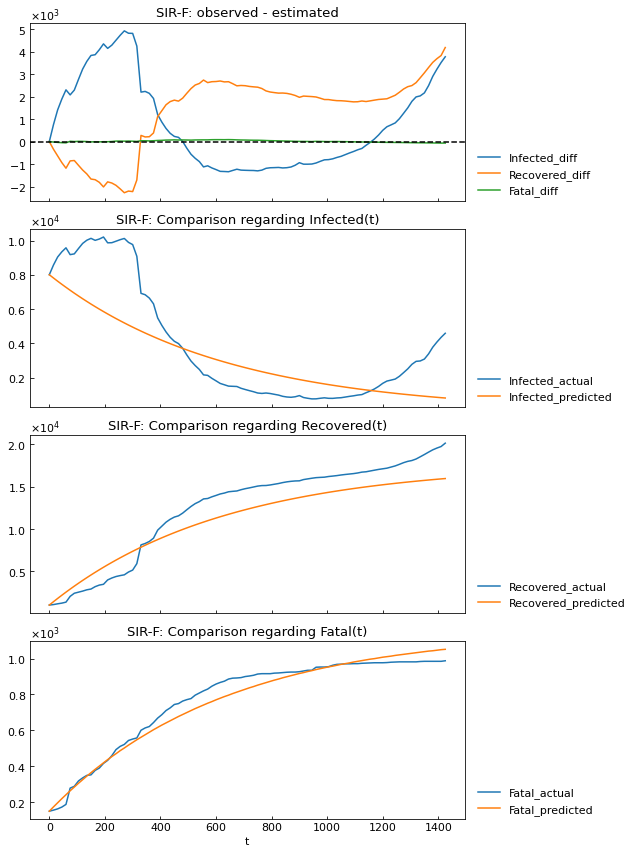

In [13]:
snl.estimate_accuracy(phase="1st")

### Get parameter value
We can get the parameter values of a phase using `Scenario.get()` method.

In [14]:
snl.get("Rt", phase="4th")

0.73

### Show parameter history
`Scenario.history()` method shows the trajectories of parameters (and the number of cases).

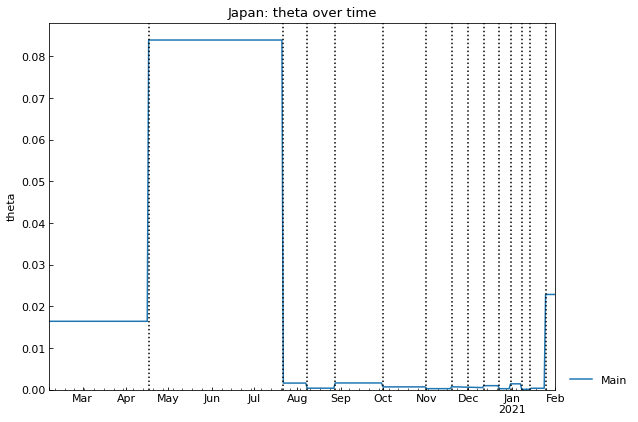

In [15]:
_ = snl.history(target="theta")

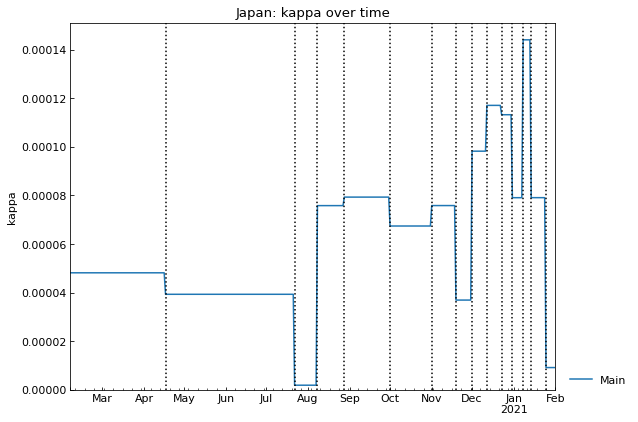

In [16]:
_ = snl.history(target="kappa")

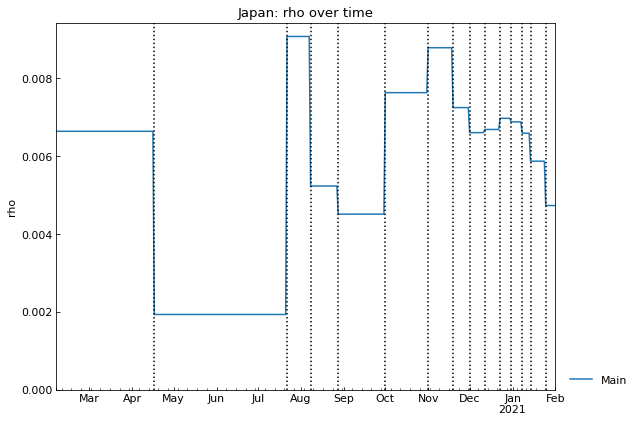

In [17]:
_ = snl.history(target="rho")

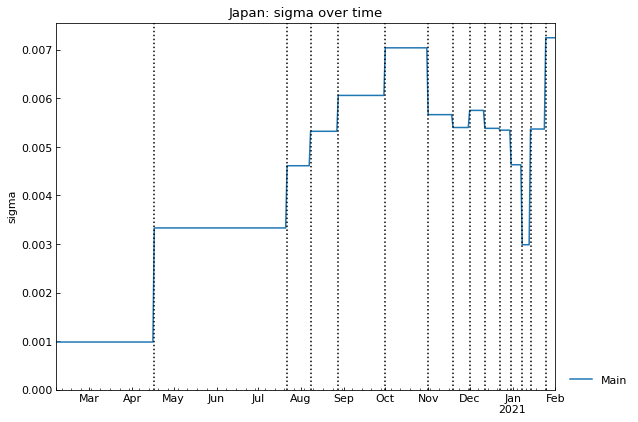

In [18]:
_ = snl.history(target="sigma")

Notes on the history of $\sigma$ value in japan (last updated: 28Dec2020):  
In Japan, we experienced two waves and we are in third wave. In the first wave (Apr - May), recovery period was too long because collapse of the medical care system occurred and no medicines were found.

Sigma values: the first wave < the second wave > the third wave

However, in the second wave (Jul - Oct), recovery period appears short because we have some effective medicines (not approved, in clinical study), yonger people (people un-associated to sever diseases) were infected.

In the third wave (Nov - ), older people tend to be infected and we are facing with medical collapse at this time...

### Show the history of reproduction number
$R_0$ ("R naught") means "the average number of secondary infections caused by an infected host" ([Infection Modeling — Part 1](https://towardsdatascience.com/infection-modeling-part-1-87e74645568a)). When this value is larger than 1, the infection disease is outbreaking.

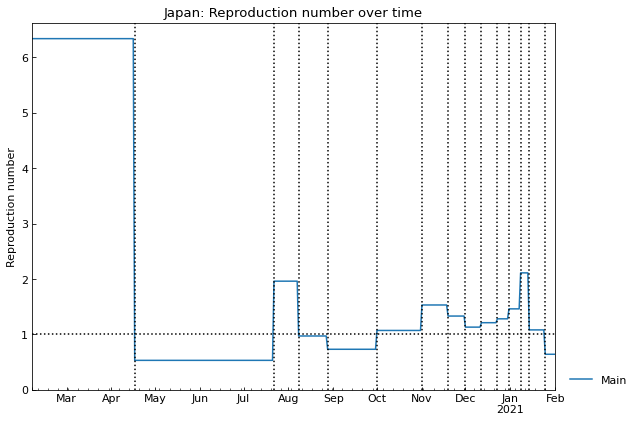

In [19]:
_ = snl.history(target="Rt")

### Simulate the number of cases
We can compare the actual and simulated (with estimated parameter values) number of confirmed/infected/recovered/fatal cases using `Scenario.history()` method.

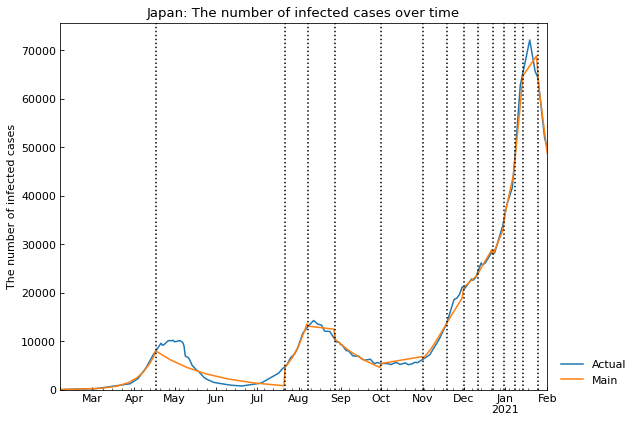

In [20]:
_ = snl.history("Infected")

### Main scenario
To investigate the effect of parameter changes, we will perform scenario analysis. In the main scenario, we will assume that the parameter values do not change after the last past phase.

i.e. If the parameter velues will not be changed until 01Apr2021, how many cases will be? We call this scenario as "Main" scenario.

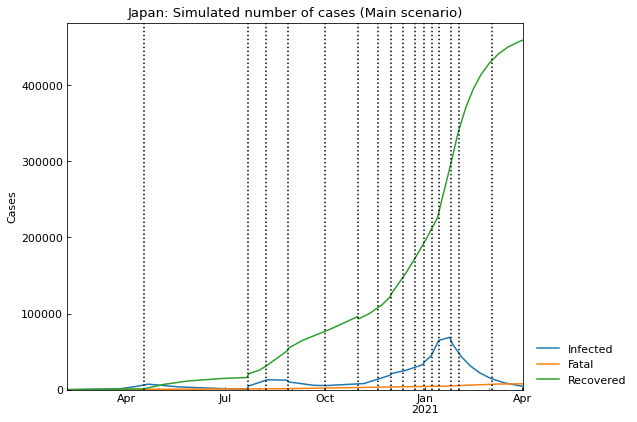

Date  Confirmed  Fatal  Infected  Recovered
417 2021-03-29     469844   7687      5260     456897
418 2021-03-30     470207   7696      5056     457455
419 2021-03-31     470556   7705      4859     457992
420 2021-04-01     470892   7713      4670     458509
421 2021-04-02     471216   7721      4488     459007

In [21]:
# Clear future phases in Main scenario
snl.clear(name="Main")
# Add one future phase 30 days with the parameter set of the last past phase
snl.add(days=30)
# Add one future phase until 01Apr2021 with the same parameter set
snl.add(end_date="01Apr2021", name="Main")
# Simulate the number of cases
snl.simulate(name="Main").tail()

### Medicine scenario
To investigate the effect of new medicines, we will assume that $\sigma$ will be changed in the future phases.

If $\sigma$ will be double in 30 days, how many cases will be? We will call this scenario as "Medicine" scenario.

In [22]:
# Calcuate the current sigma value of the last phase
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.00724833556433821

In [23]:
# Sigma value will be double
sigma_new = sigma_current * 2
sigma_new

0.01449667112867642

In [24]:
# Initialize "Medicine" scenario (with the same past phases as that of Main scenario)
snl.clear(name="Medicine")
# Add 30 days as a new future phases with the same parameter set
snl.add(name="Medicine", days=30, sigma=sigma_current)
# Add a phase until 01Apr2021 with doubled sigma value
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary(name="Medicine")

Type      Start        End  Population    ODE    Rt     theta  \
0th     Past  06Feb2020  16Apr2020   126529100  SIR-F  6.34  0.016412   
1st     Past  17Apr2020  21Jul2020   126529100  SIR-F  0.53  0.083887   
2nd     Past  22Jul2020  07Aug2020   126529100  SIR-F  1.96  0.001589   
3rd     Past  08Aug2020  27Aug2020   126529100  SIR-F  0.97  0.000364   
4th     Past  28Aug2020  30Sep2020   126529100  SIR-F  0.73  0.001618   
5th     Past  01Oct2020  31Oct2020   126529100  SIR-F  1.07  0.000677   
6th     Past  01Nov2020  18Nov2020   126529100  SIR-F  1.53  0.000252   
7th     Past  19Nov2020  30Nov2020   126529100  SIR-F  1.33  0.000705   
8th     Past  01Dec2020  11Dec2020   126529100  SIR-F  1.13  0.000503   
9th     Past  12Dec2020  22Dec2020   126529100  SIR-F  1.21  0.000968   
10th    Past  23Dec2020  30Dec2020   126529100  SIR-F  1.28  0.000243   
11th    Past  31Dec2020  07Jan2021   126529100  SIR-F  1.46  0.001408   
12th    Past  08Jan2021  13Jan2021   126529100  SIR-F  2.11  0.000086   
13th    Past  14Jan2021  24Jan2021   126529100  SIR-F  1.08  0.000344   
14th    Past  25Jan2021  01Feb2021   126529100  SIR-F  0.64  0.022849   
15th  Future  02Feb2021  03Mar2021   126529100  SIR-F  0.64  0.022849   
16th  Future  04Mar2021  01Apr2021   126529100  SIR-F  0.32  0.022849   

         kappa       rho     sigma  tau  1/beta [day]  1/alpha2 [day]  \
0th   0.000048  0.006637  0.000982   96            10            1385   
1st   0.000039  0.001932  0.003332   96            34            1696   
2nd   0.000002  0.009073  0.004613   96             7           35976   
3rd   0.000076  0.005233  0.005322   96            12             879   
4th   0.000079  0.004509  0.006061   96            14             840   
5th   0.000067  0.007630  0.007041   96             8             989   
6th   0.000076  0.008784  0.005665   96             7             879   
7th   0.000037  0.007246  0.005400   96             9            1806   
8th   0.000098  0.006603  0.005752   96            10             678   
9th   0.000117  0.006684  0.005383   96             9             569   
10th  0.000113  0.006971  0.005345   96             9             588   
11th  0.000079  0.006879  0.004633   96             9             843   
12th  0.000144  0.006589  0.002986   96            10             462   
13th  0.000079  0.005870  0.005369   96            11             843   
14th  0.000009  0.004730  0.007248   96            14            7314   
15th  0.000009  0.004730  0.007248   96            14            7314   
16th  0.000009  0.004730  0.014497   96            14            7314   

      1/gamma [day]  alpha1 [-]       RMSLE Trials       Runtime  
0th              67       0.016    0.309729    527  1 min  0 sec  
1st              20       0.084    0.411662    499  1 min  0 sec  
2nd              14       0.002   0.0273816    524  0 min 50 sec  
3rd              12       0.000    0.055505    583  1 min  0 sec  
4th              10       0.002   0.0417846    306  0 min 30 sec  
5th               9       0.001   0.0723546    494  0 min 50 sec  
6th              11       0.000   0.0408213    608  1 min  0 sec  
7th              12       0.001   0.0605636    603  1 min  0 sec  
8th              11       0.001  0.00724996    413  0 min 40 sec  
9th              12       0.001   0.0141735    821  1 min  0 sec  
10th             12       0.000   0.0126556    810  1 min  0 sec  
11th             14       0.001  0.00989529    259  0 min 20 sec  
12th             22       0.000   0.0377071    931  1 min  0 sec  
13th             12       0.000   0.0263838    913  1 min  0 sec  
14th              9       0.023   0.0103895    276  0 min 10 sec  
15th              9       0.023           -      -             -  
16th              4       0.023           -      -             -

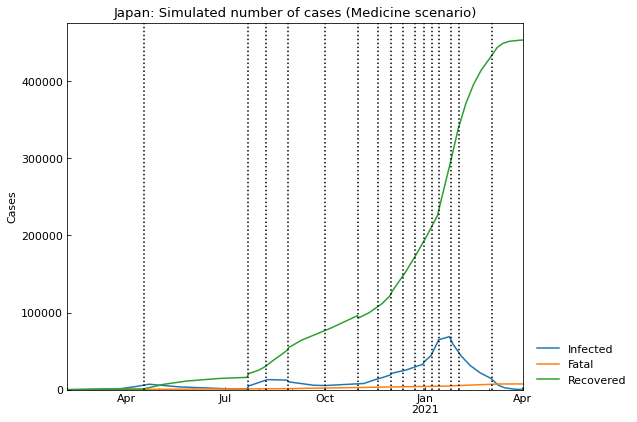

Date  Confirmed  Fatal  Infected  Recovered
417 2021-03-29     460540   7457       348     452735
418 2021-03-30     460562   7457       300     452805
419 2021-03-31     460583   7458       259     452866
420 2021-04-01     460599   7458       223     452918
421 2021-04-02     460613   7458       192     452963

In [25]:
# Simulate the number of cases
snl.simulate(name="Medicine").tail()

### Short-term prediction of parameter values
With OxCGRT data, we can predict the parameter values of the future phases because [OxCGRT indicators](https://github.com/OxCGRT/covid-policy-tracker) (policy measures) impact on parameter values with delay period (calculated with `cenario.estimate_delay()` with version > 2.15.0-beta or set as recovery period).  

OxCGRT indicators are

- school_closing,
- workplace_closing,
- cancel_events, 
- gatherings_restrictions,
- transport_closing,
- stay_home_restrictions,
- internal_movement_restrictions,
- international_movement_restrictions,
- information_campaigns,
- testing_policy, and
- contact_tracing.

In [26]:
# Fitting with linear regression model (Elastic Net regression)
fit_dict = snl.fit(oxcgrt_data=oxcgrt_data, name="Forecast")
print(f"Determination coefficient: {fit_dict['score_train']} (train)")
print(f"Determination coefficient: {fit_dict['score_test']} (test)")
print("Intercept:")
fit_dict["intercept"].style.background_gradient(axis=None)

Determination coefficient: 0.6385480044493743 (train)
Determination coefficient: 0.6355400490833092 (test)
Intercept:


In [27]:
# Short-term prediction
snl.predict(name="Forecast").summary(name="Forecast")

Type      Start        End  Population    ODE    Rt     theta  \
0th     Past  06Feb2020  16Apr2020   126529100  SIR-F  6.34  0.016412   
1st     Past  17Apr2020  21Jul2020   126529100  SIR-F  0.53  0.083887   
2nd     Past  22Jul2020  07Aug2020   126529100  SIR-F  1.96  0.001589   
3rd     Past  08Aug2020  27Aug2020   126529100  SIR-F  0.97  0.000364   
4th     Past  28Aug2020  30Sep2020   126529100  SIR-F  0.73  0.001618   
5th     Past  01Oct2020  31Oct2020   126529100  SIR-F  1.07  0.000677   
6th     Past  01Nov2020  18Nov2020   126529100  SIR-F  1.53  0.000252   
7th     Past  19Nov2020  30Nov2020   126529100  SIR-F  1.33  0.000705   
8th     Past  01Dec2020  11Dec2020   126529100  SIR-F  1.13  0.000503   
9th     Past  12Dec2020  22Dec2020   126529100  SIR-F  1.21  0.000968   
10th    Past  23Dec2020  30Dec2020   126529100  SIR-F  1.28  0.000243   
11th    Past  31Dec2020  07Jan2021   126529100  SIR-F  1.46  0.001408   
12th    Past  08Jan2021  13Jan2021   126529100  SIR-F  2.11  0.000086   
13th    Past  14Jan2021  24Jan2021   126529100  SIR-F  1.08  0.000344   
14th    Past  25Jan2021  01Feb2021   126529100  SIR-F  0.64  0.022849   
15th  Future  02Feb2021  17Feb2021   126529100  SIR-F  1.11  0.008952   

         kappa       rho     sigma  tau  1/beta [day]  1/alpha2 [day]  \
0th   0.000048  0.006637  0.000982   96            10            1385   
1st   0.000039  0.001932  0.003332   96            34            1696   
2nd   0.000002  0.009073  0.004613   96             7           35976   
3rd   0.000076  0.005233  0.005322   96            12             879   
4th   0.000079  0.004509  0.006061   96            14             840   
5th   0.000067  0.007630  0.007041   96             8             989   
6th   0.000076  0.008784  0.005665   96             7             879   
7th   0.000037  0.007246  0.005400   96             9            1806   
8th   0.000098  0.006603  0.005752   96            10             678   
9th   0.000117  0.006684  0.005383   96             9             569   
10th  0.000113  0.006971  0.005345   96             9             588   
11th  0.000079  0.006879  0.004633   96             9             843   
12th  0.000144  0.006589  0.002986   96            10             462   
13th  0.000079  0.005870  0.005369   96            11             843   
14th  0.000009  0.004730  0.007248   96            14            7314   
15th  0.000079  0.005710  0.005030   96            11             843   

      1/gamma [day]  alpha1 [-]       RMSLE Trials       Runtime  
0th              67       0.016    0.309729    527  1 min  0 sec  
1st              20       0.084    0.411662    499  1 min  0 sec  
2nd              14       0.002   0.0273816    524  0 min 50 sec  
3rd              12       0.000    0.055505    583  1 min  0 sec  
4th              10       0.002   0.0417846    306  0 min 30 sec  
5th               9       0.001   0.0723546    494  0 min 50 sec  
6th              11       0.000   0.0408213    608  1 min  0 sec  
7th              12       0.001   0.0605636    603  1 min  0 sec  
8th              11       0.001  0.00724996    413  0 min 40 sec  
9th              12       0.001   0.0141735    821  1 min  0 sec  
10th             12       0.000   0.0126556    810  1 min  0 sec  
11th             14       0.001  0.00989529    259  0 min 20 sec  
12th             22       0.000   0.0377071    931  1 min  0 sec  
13th             12       0.000   0.0263838    913  1 min  0 sec  
14th              9       0.023   0.0103895    276  0 min 10 sec  
15th             13       0.009           -      -             -

In [28]:
# Or, when you do not need 'fit_dict'
# snl.fit_predict(oxcgrt_data=oxcgrt_data, name="Forecast").summary(name="Forecast")

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values. Currently, we can compare the scenarios with the following indexes.

- max(Infected): max value of Infected
- argmax(Infected): the date when Infected shows max value
- Infected on …: Infected on the end date of the last phase
- Fatal on …: Fatal on the end date of the last phase

In [29]:
snl.describe()

max(Infected) argmax(Infected)  Confirmed on 02Apr2021  \
Main              68771        24Jan2021                471216.0   
Medicine          68771        24Jan2021                460613.0   
Forecast          68771        24Jan2021                     NaN   

          Infected on 02Apr2021  Fatal on 02Apr2021  Confirmed on 18Feb2021  \
Main                     4488.0              7721.0                     NaN   
Medicine                  192.0              7458.0                     NaN   
Forecast                    NaN                 NaN                464145.0   

          Infected on 18Feb2021  Fatal on 18Feb2021  15th_Rt 16th_Rt  
Main                        NaN                 NaN     0.64    0.64  
Medicine                    NaN                 NaN     0.64    0.32  
Forecast                53147.0              7414.0     1.11       -

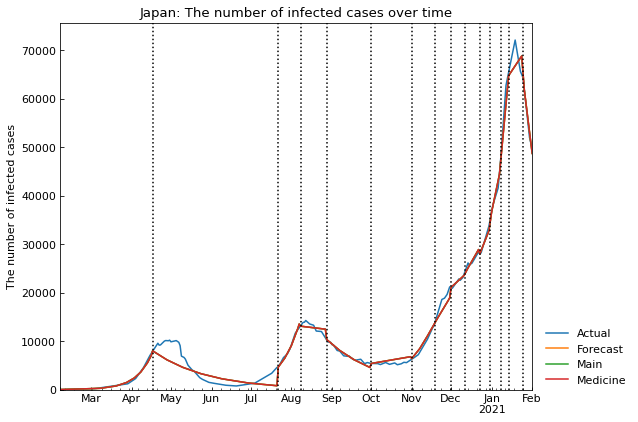

In [30]:
_ = snl.history(target="Infected")

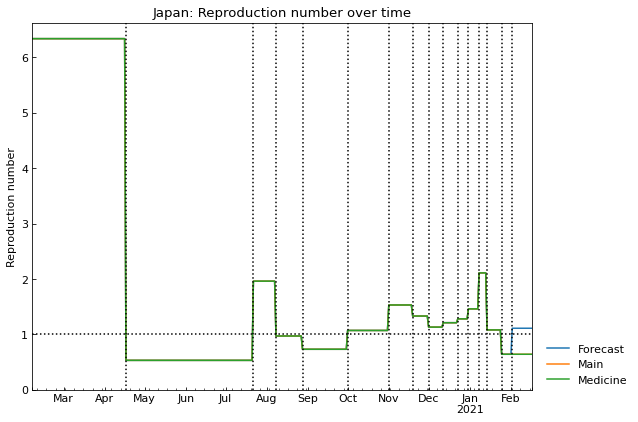

In [31]:
_ = snl.history(target="Rt")

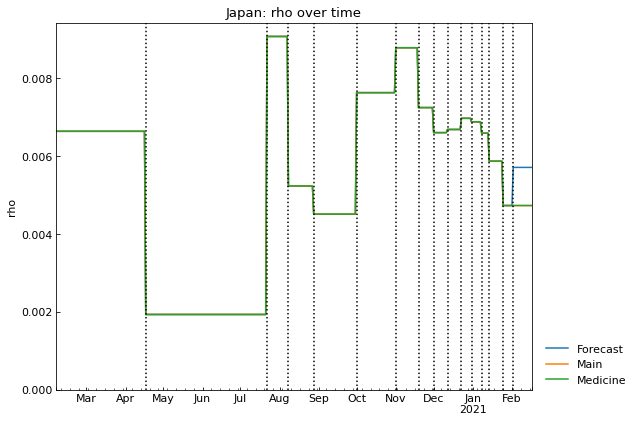

In [32]:
_ = snl.history(target="rho")

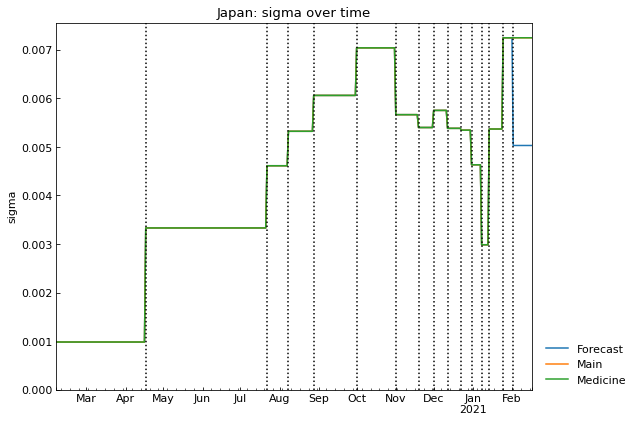

In [33]:
_ = snl.history(target="sigma")

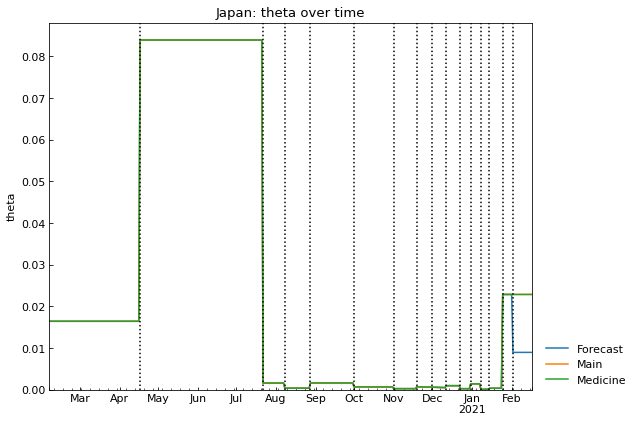

In [34]:
_ = snl.history(target="theta")

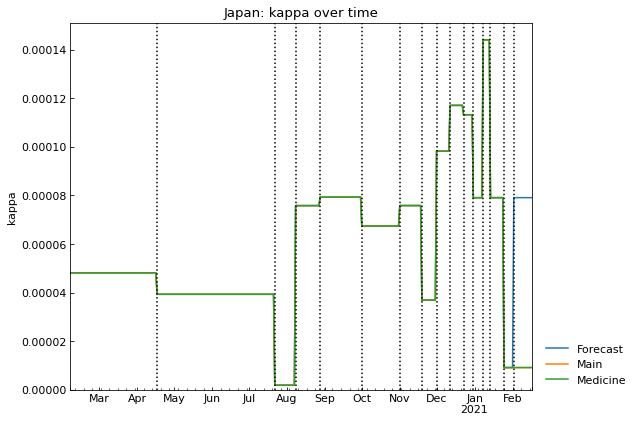

In [35]:
_ = snl.history(target="kappa")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

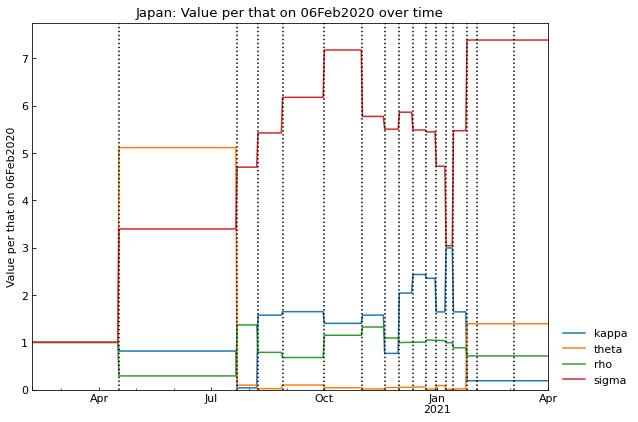

In [36]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [37]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 8 CPUs...


	15th phase (25Jan2021 - 01Feb2021): finished  276 trials in 0 min 10 sec


	 4th phase (28Aug2020 - 31Aug2020): finished  234 trials in 0 min 20 sec

	 2nd phase (22Jul2020 - 07Aug2020): finished  517 trials in 0 min 50 sec

	 6th phase (01Oct2020 - 31Oct2020): finished  483 trials in 0 min 50 sec

	 3rd phase (08Aug2020 - 27Aug2020): finished  757 trials in 1 min 20 sec

	 1st phase (17Apr2020 - 21Jul2020): finished  723 trials in 1 min 31 sec

	 9th phase (01Dec2020 - 11Dec2020): finished  401 trials in 0 min 40 sec

	 5th phase (01Sep2020 - 30Sep2020): finished  791 trials in 1 min 31 sec

	 0th phase (06Feb2020 - 16Apr2020): finished  819 trials in 1 min 41 sec

	 8th phase (19Nov2020 - 30Nov2020): finished  750 trials in 1 min 21 sec

	12th phase (31Dec2020 - 07Jan2021): finished  207 trials in 0 min 20 sec

	10th phase (12Dec2020 - 22Dec2020): finished  584 trials in 1 min  0 sec

	 7th phase (01Nov2020 - 18Nov2020): finished 1500 trials in 2 min 41 sec

	11th phase (23Dec2020 - 30Dec2020): finished  957 trials in 1 min 20 sec

	13th phase (08Jan2021 - 13Jan2021): finished 1025 trials in 1 min 20 sec

	14th phase (14Jan2021 - 24Jan2021): finished 1225 trials in 1 min 30 sec

Completed optimization. Total: 3 min 14 sec



<SIR-F model: parameter estimation>
Running optimization with 8 CPUs...


	 5th phase (01Sep2020 - 01Feb2021): finished 2118 trials in 0 min 40 sec

Completed optimization. Total: 0 min 41 sec


In [38]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  16Apr2020  SIR-F  5.16  0.000664  0.000185   
              1st    17Apr2020  21Jul2020  SIR-F  0.53  0.083887  0.000039   
              2nd    22Jul2020  07Aug2020  SIR-F  1.96  0.001589  0.000002   
              3rd    08Aug2020  27Aug2020  SIR-F  0.97  0.000364  0.000076   
              4th    28Aug2020  31Aug2020  SIR-F  0.85  0.015930  0.000014   
              5th    01Sep2020  30Sep2020  SIR-F  0.78  0.000327  0.000113   
              6th    01Oct2020  31Oct2020  SIR-F  1.07  0.000677  0.000067   
              7th    01Nov2020  18Nov2020  SIR-F  1.45  0.001061  0.000069   
              8th    19Nov2020  30Nov2020  SIR-F  1.33  0.000705  0.000037   
              9th    01Dec2020  11Dec2020  SIR-F  1.13  0.000503  0.000098   
              10th   12Dec2020  22Dec2020  SIR-F  1.12  0.001154  0.000097   
              11th   23Dec2020  30Dec2020  SIR-F  1.28  0.000243  0.000113   
              12th   31Dec2020  07Jan2021  SIR-F  1.46  0.001408  0.000079   
              13th   08Jan2021  13Jan2021  SIR-F  2.07  0.000676  0.000084   
              14th   14Jan2021  24Jan2021  SIR-F  1.08  0.000344  0.000079   
              15th   25Jan2021  01Feb2021  SIR-F  0.64  0.022849  0.000009   
Retrospective 0th    06Feb2020  16Apr2020  SIR-F  5.16  0.000664  0.000185   
              1st    17Apr2020  21Jul2020  SIR-F  0.53  0.083887  0.000039   
              2nd    22Jul2020  07Aug2020  SIR-F  1.96  0.001589  0.000002   
              3rd    08Aug2020  27Aug2020  SIR-F  0.97  0.000364  0.000076   
              4th    28Aug2020  31Aug2020  SIR-F  0.85  0.015930  0.000014   
              5th    01Sep2020  01Feb2021  SIR-F  0.85  0.015930  0.000014   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.006780  0.001129  0.292634     819  1 min 41 sec  
              1st    0.001932  0.003332  0.411662     723  1 min 31 sec  
              2nd    0.009073  0.004613  0.027382     517  0 min 50 sec  
              3rd    0.005233  0.005322  0.055505     757  1 min 20 sec  
              4th    0.005349  0.006186  0.013209     234  0 min 20 sec  
              5th    0.005173  0.006525  0.035980     791  1 min 31 sec  
              6th    0.007630  0.007041  0.072355     483  0 min 50 sec  
              7th    0.008664  0.005893  0.029234    1500  2 min 41 sec  
              8th    0.007246  0.005400  0.060564     750  1 min 21 sec  
              9th    0.006603  0.005752  0.007250     401  0 min 40 sec  
              10th   0.006864  0.006047  0.021981     584  1 min  0 sec  
              11th   0.006971  0.005345  0.012656     957  1 min 20 sec  
              12th   0.006879  0.004633  0.009895     207  0 min 20 sec  
              13th   0.007439  0.003507  0.021889    1025  1 min 20 sec  
              14th   0.005870  0.005369  0.026384    1225  1 min 30 sec  
              15th   0.004730  0.007248  0.010389     276  0 min 10 sec  
Retrospective 0th    0.006780  0.001129  0.292634     819  1 min 41 sec  
              1st    0.001932  0.003332  0.411662     723  1 min 31 sec  
              2nd    0.009073  0.004613  0.027382     517  0 min 50 sec  
              3rd    0.005233  0.005322  0.055505     757  1 min 20 sec  
              4th    0.005349  0.006186  0.013209     234  0 min 20 sec  
              5th    0.005349  0.006186  1.280908    2118  0 min 40 sec

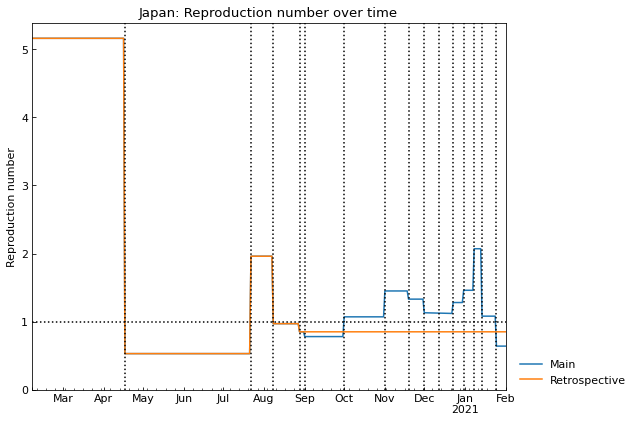

In [39]:
# History of reproduction number
_ = snl_retro.history("Rt")

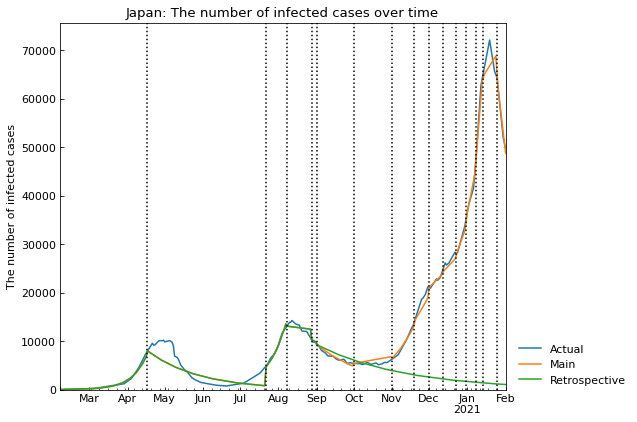

In [40]:
# History of Infected
_ = snl_retro.history("Infected")

In [41]:
# Show the representative values
snl_retro.describe()

max(Infected) argmax(Infected)  Confirmed on 02Feb2021  \
Main                   68771        24Jan2021                  395988   
Retrospective          13540        07Aug2020                  115066   

               Infected on 02Feb2021  Fatal on 02Feb2021  5th_Rt 6th_Rt  \
Main                           46792                5857    0.78   1.07   
Retrospective                   1055                2164    0.85      -   

              7th_Rt 8th_Rt 9th_Rt 10th_Rt 11th_Rt 12th_Rt 13th_Rt 14th_Rt  \
Main            1.45   1.33   1.13    1.12    1.28    1.46    2.07    1.08   
Retrospective      -      -      -       -       -       -       -       -   

              15th_Rt  
Main             0.64  
Retrospective       -